In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

# Extraction

In [124]:
url = "https://ecobici.cdmx.gob.mx/wp-content/uploads/2025/08/2025-07.csv"
csv_file_name = "data.csv"

try:
    response = requests.get(url, timeout=1200)
    response.raise_for_status()
    print("Descarga completada con éxito")
except requests.exceptions.Timeout as e:
    print(f"Error de timeout durante la descarga: {e}")
    df_raw = pd.DataFrame
except requests.exceptions.RequestException as e:
    print(f"Error durante la descarga: {e}")
    df_raw = pd.DataFrame()

Descarga completada con éxito


In [125]:
with open(csv_file_name, 'wb') as f:
    f.write(response.content)
print(f"Archivo  guardado como {csv_file_name}")

print(f"Leyendo datos desde: {csv_file_name}")
df_raw = pd.read_csv(csv_file_name)
print("Extracción completada con éxito")


Archivo  guardado como data.csv
Leyendo datos desde: data.csv
Extracción completada con éxito


In [126]:
print("Tamaño del DataFrame:")
print(df_raw.shape)

print("Previsualización del DataFrame")
display(df_raw.head(20))

Tamaño del DataFrame:
(1663896, 9)
Previsualización del DataFrame


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo
0,M,30.0,4998803,173,30/06/2025,23:33:59,348,01/07/2025,00:00:11
1,M,27.0,3976669,009,30/06/2025,23:41:24,086,01/07/2025,00:00:21
2,M,43.0,8223240,576,30/06/2025,23:48:16,296,01/07/2025,00:00:24
3,M,26.0,6050157,365,30/06/2025,23:52:12,329,01/07/2025,00:00:27
4,M,23.0,5124706,144,30/06/2025,23:54:55,575,01/07/2025,00:00:46
5,M,19.0,2053122,137,30/06/2025,23:33:00,343,01/07/2025,00:00:52
6,M,48.0,4574182,124,30/06/2025,23:46:14,576,01/07/2025,00:00:58
7,M,28.0,8244592,595,30/06/2025,23:47:40,618,01/07/2025,00:01:16
8,M,39.0,7042187,160,30/06/2025,23:17:37,255,01/07/2025,00:01:28
9,M,48.0,6648281,271-272,30/06/2025,23:49:30,545,01/07/2025,00:01:30


# Transformation
Important for data quality:
- accuracy
- completeness
- consistency 
- uniqueness

## Limpieza

In [127]:
df = df_raw.copy()

# formato de fechas
print("Tipos de datos previos")
print(df[['Fecha_Arribo', 'Fecha_Retiro']].dtypes)

df['FechaHora_Retiro'] = pd.to_datetime(
    df['Fecha_Retiro'] + ' ' + df['Hora_Retiro'],
    format='%d/%m/%Y %H:%M:%S'  # Ajusta el formato según tus datos
)

df['FechaHora_Arribo'] = pd.to_datetime(
    df['Fecha_Arribo'] + ' ' + df['Hora_Arribo'],
    format='%d/%m/%Y %H:%M:%S'  # Ajusta el formato según tus datos
)

print("Tipos de datos tras transformación")
print(df[['FechaHora_Arribo', 'FechaHora_Retiro']].dtypes)

print("Previsualización del DataFrame después de la conversión:")
display(df.head())

Tipos de datos previos
Fecha_Arribo    object
Fecha_Retiro    object
dtype: object
Tipos de datos tras transformación
FechaHora_Arribo    datetime64[ns]
FechaHora_Retiro    datetime64[ns]
dtype: object
Previsualización del DataFrame después de la conversión:


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,FechaHora_Retiro,FechaHora_Arribo
0,M,30.0,4998803,173,30/06/2025,23:33:59,348,01/07/2025,00:00:11,2025-06-30 23:33:59,2025-07-01 00:00:11
1,M,27.0,3976669,009,30/06/2025,23:41:24,086,01/07/2025,00:00:21,2025-06-30 23:41:24,2025-07-01 00:00:21
2,M,43.0,8223240,576,30/06/2025,23:48:16,296,01/07/2025,00:00:24,2025-06-30 23:48:16,2025-07-01 00:00:24
3,M,26.0,6050157,365,30/06/2025,23:52:12,329,01/07/2025,00:00:27,2025-06-30 23:52:12,2025-07-01 00:00:27
4,M,23.0,5124706,144,30/06/2025,23:54:55,575,01/07/2025,00:00:46,2025-06-30 23:54:55,2025-07-01 00:00:46


In [128]:
# revisar valores nulos
print("Valores nulos previos")
print(df.isnull().sum())

#para genero eliminar registros con null y quitar registros con ?
df.dropna(subset=['Genero_Usuario'], inplace=True)
df = df[df['Genero_Usuario'] != '?'] 

#para edad también eliminar registros
df.dropna(subset=['Edad_Usuario'], inplace=True)

print("Valores nulos tras limpieza")
print(df.isnull().sum())

Valores nulos previos
Genero_Usuario            3
Edad_Usuario             80
Bici                      0
Ciclo_Estacion_Retiro     0
Fecha_Retiro              0
Hora_Retiro               0
Ciclo_EstacionArribo      0
Fecha_Arribo              0
Hora_Arribo               0
FechaHora_Retiro          0
FechaHora_Arribo          0
dtype: int64
Valores nulos tras limpieza
Genero_Usuario           0
Edad_Usuario             0
Bici                     0
Ciclo_Estacion_Retiro    0
Fecha_Retiro             0
Hora_Retiro              0
Ciclo_EstacionArribo     0
Fecha_Arribo             0
Hora_Arribo              0
FechaHora_Retiro         0
FechaHora_Arribo         0
dtype: int64


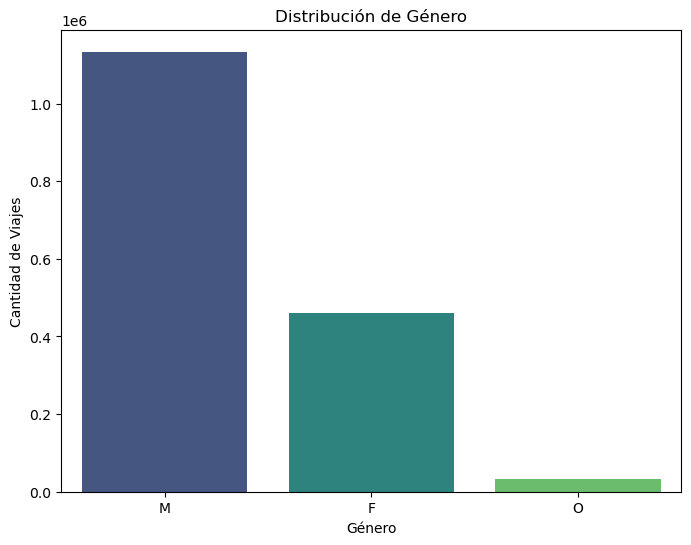

In [129]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Genero_Usuario', palette='viridis', hue='Genero_Usuario', legend=False)
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Viajes')
plt.show()

In [130]:
# Aplicar encoding a genero
df_encoded = pd.get_dummies(df, columns=['Genero_Usuario'], prefix=['genero'])

print("DataFrame después de One-Hot Encoding:")
display(df_encoded.head())

print("Viajes x genero")
print(df['Genero_Usuario'].value_counts())

DataFrame después de One-Hot Encoding:


,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,FechaHora_Retiro,FechaHora_Arribo,genero_F,genero_M,genero_O
0,30.0,4998803,173,30/06/2025,23:33:59,348,01/07/2025,00:00:11,2025-06-30 23:33:59,2025-07-01 00:00:11,False,True,False
1,27.0,3976669,009,30/06/2025,23:41:24,086,01/07/2025,00:00:21,2025-06-30 23:41:24,2025-07-01 00:00:21,False,True,False
2,43.0,8223240,576,30/06/2025,23:48:16,296,01/07/2025,00:00:24,2025-06-30 23:48:16,2025-07-01 00:00:24,False,True,False
3,26.0,6050157,365,30/06/2025,23:52:12,329,01/07/2025,00:00:27,2025-06-30 23:52:12,2025-07-01 00:00:27,False,True,False
4,23.0,5124706,144,30/06/2025,23:54:55,575,01/07/2025,00:00:46,2025-06-30 23:54:55,2025-07-01 00:00:46,False,True,False


Viajes x genero
Genero_Usuario
M    1133558
F     459838
O      31784
Name: count, dtype: int64


In [131]:
# crear columna de duración de recorrido
df_encoded['Duracion_Recorrido'] = (df_encoded['FechaHora_Arribo'] - df_encoded['FechaHora_Retiro']).dt.total_seconds()/60
display(df_encoded.head())

,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,FechaHora_Retiro,FechaHora_Arribo,genero_F,genero_M,genero_O,Duracion_Recorrido
0,30.0,4998803,173,30/06/2025,23:33:59,348,01/07/2025,00:00:11,2025-06-30 23:33:59,2025-07-01 00:00:11,False,True,False,26.200000
1,27.0,3976669,009,30/06/2025,23:41:24,086,01/07/2025,00:00:21,2025-06-30 23:41:24,2025-07-01 00:00:21,False,True,False,18.950000
2,43.0,8223240,576,30/06/2025,23:48:16,296,01/07/2025,00:00:24,2025-06-30 23:48:16,2025-07-01 00:00:24,False,True,False,12.133333
3,26.0,6050157,365,30/06/2025,23:52:12,329,01/07/2025,00:00:27,2025-06-30 23:52:12,2025-07-01 00:00:27,False,True,False,8.250000
4,23.0,5124706,144,30/06/2025,23:54:55,575,01/07/2025,00:00:46,2025-06-30 23:54:55,2025-07-01 00:00:46,False,True,False,5.850000


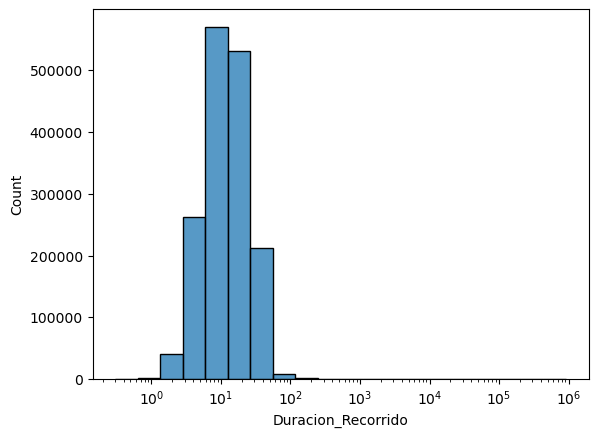

count    1.625180e+06
mean     1.672561e+01
std      1.024924e+03
min      3.000000e-01
25%      6.983333e+00
50%      1.165000e+01
75%      1.955000e+01
max      9.186693e+05
Name: Duracion_Recorrido, dtype: float64


,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,FechaHora_Retiro,FechaHora_Arribo,genero_F,genero_M,genero_O,Duracion_Recorrido,Viaje_atipico
0,30.0,4998803,173,30/06/2025,23:33:59,348,01/07/2025,00:00:11,2025-06-30 23:33:59,2025-07-01 00:00:11,False,True,False,26.200000,0
1,27.0,3976669,009,30/06/2025,23:41:24,086,01/07/2025,00:00:21,2025-06-30 23:41:24,2025-07-01 00:00:21,False,True,False,18.950000,0
2,43.0,8223240,576,30/06/2025,23:48:16,296,01/07/2025,00:00:24,2025-06-30 23:48:16,2025-07-01 00:00:24,False,True,False,12.133333,0
3,26.0,6050157,365,30/06/2025,23:52:12,329,01/07/2025,00:00:27,2025-06-30 23:52:12,2025-07-01 00:00:27,False,True,False,8.250000,0
4,23.0,5124706,144,30/06/2025,23:54:55,575,01/07/2025,00:00:46,2025-06-30 23:54:55,2025-07-01 00:00:46,False,True,False,5.850000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663891,37.0,4134847,306,31/07/2025,23:45:36,288,31/07/2025,23:59:29,2025-07-31 23:45:36,2025-07-31 23:59:29,False,True,False,13.883333,0
1663892,30.0,5042023,137,31/07/2025,23:43:55,273-274,31/07/2025,23:59:30,2025-07-31 23:43:55,2025-07-31 23:59:30,False,True,False,15.583333,0
1663893,27.0,7920309,463,31/07/2025,23:16:26,091,31/07/2025,23:59:46,2025-07-31 23:16:26,2025-07-31 23:59:46,False,True,False,43.333333,0
1663894,26.0,4769626,454,31/07/2025,23:54:26,192-193,31/07/2025,23:59:49,2025-07-31 23:54:26,2025-07-31 23:59:49,False,True,False,5.383333,0


In [132]:
sns.histplot(df_encoded['Duracion_Recorrido'], bins=20, log_scale=True)
plt.show()

print(df_encoded['Duracion_Recorrido'].describe())

df_encoded["Viaje_atipico"] = (df_encoded['Duracion_Recorrido'] > 60).astype(int)
df_encoded


In [133]:
count_atipicos = df_encoded['Viaje_atipico'].sum()
cantidad_deseada = 2 * count_atipicos

viajes_normales = df_encoded[df_encoded['Viaje_atipico'] == 0]

viajes_normales_muestra = viajes_normales.sample(n=cantidad_deseada, random_state=42)

viajes_atipicos = df_encoded[df_encoded['Viaje_atipico'] == 1]

df_balanced = pd.concat([viajes_normales_muestra, viajes_atipicos], ignore_index=True)

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df_balanced

,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,FechaHora_Retiro,FechaHora_Arribo,genero_F,genero_M,genero_O,Duracion_Recorrido,Viaje_atipico
0,26.0,3955838,644,17/07/2025,15:20:14,645,17/07/2025,15:23:04,2025-07-17 15:20:14,2025-07-17 15:23:04,False,True,False,2.833333,0
1,36.0,7180250,701,08/07/2025,19:15:15,697,08/07/2025,19:21:11,2025-07-08 19:15:15,2025-07-08 19:21:11,False,True,False,5.933333,0
2,28.0,2222016,194,23/07/2025,16:01:02,010,23/07/2025,17:30:25,2025-07-23 16:01:02,2025-07-23 17:30:25,True,False,False,89.383333,1
3,34.0,7767114,131,27/07/2025,12:16:52,185,27/07/2025,13:22:35,2025-07-27 12:16:52,2025-07-27 13:22:35,False,True,False,65.716667,1
4,27.0,6383244,710,30/07/2025,14:14:47,710,30/07/2025,14:53:06,2025-07-30 14:14:47,2025-07-30 14:53:06,False,True,False,38.316667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21517,19.0,8573040,053,17/07/2025,16:43:54,179,17/07/2025,16:51:32,2025-07-17 16:43:54,2025-07-17 16:51:32,False,True,False,7.633333,0
21518,31.0,8454787,384,19/07/2025,13:31:36,412,19/07/2025,13:46:09,2025-07-19 13:31:36,2025-07-19 13:46:09,False,False,True,14.550000,0
21519,23.0,5316591,580,29/07/2025,09:06:24,576,29/07/2025,09:33:22,2025-07-29 09:06:24,2025-07-29 09:33:22,False,True,False,26.966667,0
21520,24.0,3026861,218,03/07/2025,11:57:43,217,03/07/2025,12:00:26,2025-07-03 11:57:43,2025-07-03 12:00:26,True,False,False,2.716667,0


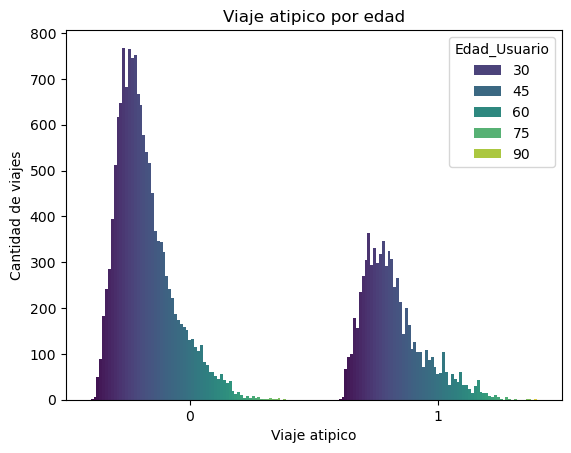

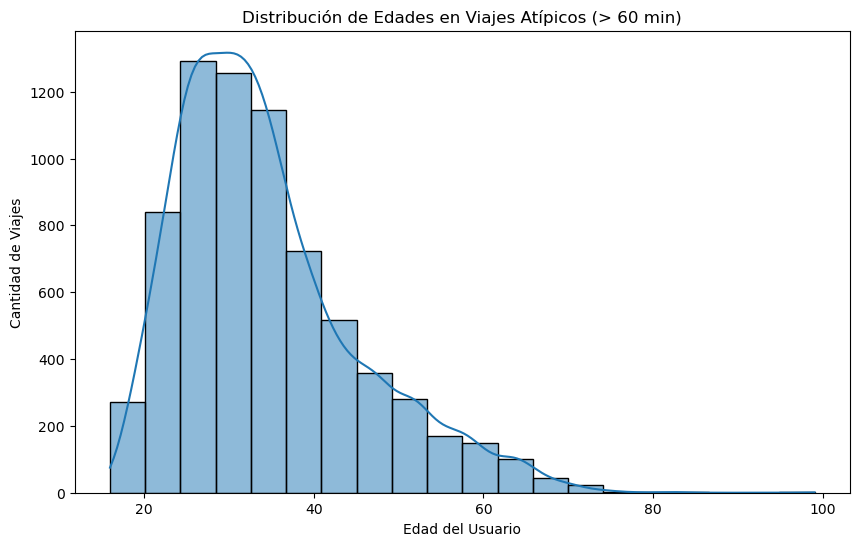

In [134]:
sns.countplot(data=df_balanced, x='Viaje_atipico', palette='viridis', hue='Edad_Usuario')
plt.title('Viaje atipico por edad')
plt.xlabel('Viaje atipico')
plt.ylabel('Cantidad de viajes')
plt.show()

viajes_atipicos = df_balanced[df_balanced['Viaje_atipico'] == 1]

# Histograma de edades para viajes atípicos
plt.figure(figsize=(10, 6))
sns.histplot(data=viajes_atipicos, x='Edad_Usuario', bins=20, kde=True)
plt.title('Distribución de Edades en Viajes Atípicos (> 60 min)')
plt.xlabel('Edad del Usuario')
plt.ylabel('Cantidad de Viajes')
plt.show()

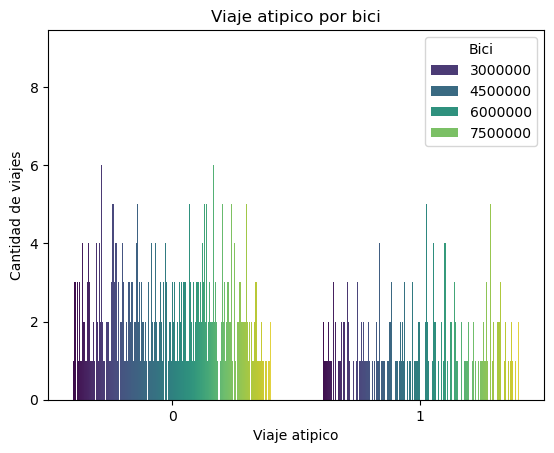

In [135]:
sns.countplot(data=df_balanced, x='Viaje_atipico', palette='viridis', hue='Bici')
plt.title('Viaje atipico por bici')
plt.xlabel('Viaje atipico')
plt.ylabel('Cantidad de viajes')
plt.show()


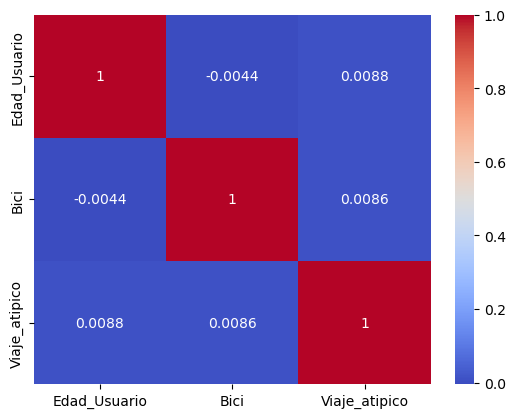

In [136]:
num_cols = ['Edad_Usuario', 'Bici', 'Viaje_atipico']
num_cols = [col for col in num_cols if col in df_balanced.columns]
corr = df_balanced[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

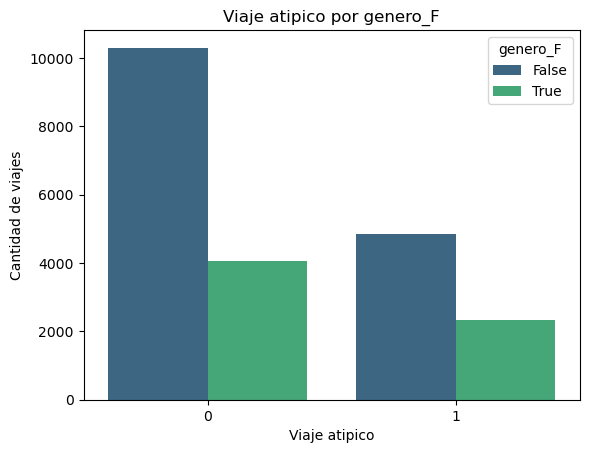

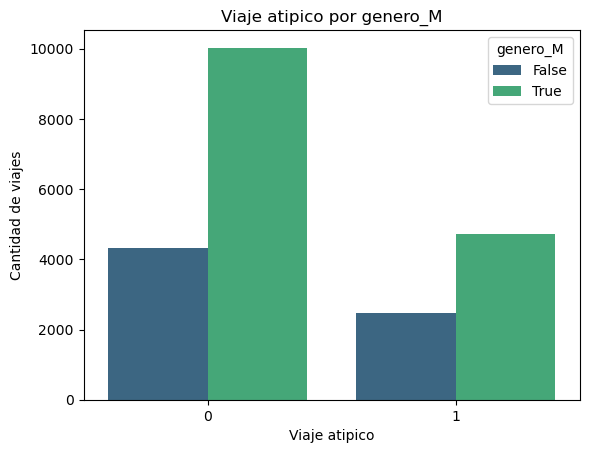

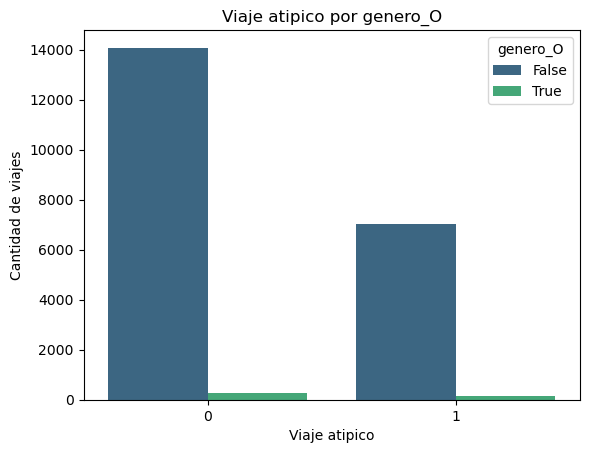

In [137]:
sns.countplot(data=df_balanced, x='Viaje_atipico', palette='viridis', hue='genero_F')
plt.title('Viaje atipico por genero_F')
plt.xlabel('Viaje atipico')
plt.ylabel('Cantidad de viajes')
plt.show()

sns.countplot(data=df_balanced, x='Viaje_atipico', palette='viridis', hue='genero_M')
plt.title('Viaje atipico por genero_M')
plt.xlabel('Viaje atipico')
plt.ylabel('Cantidad de viajes')
plt.show()

sns.countplot(data=df_balanced, x='Viaje_atipico', palette='viridis', hue='genero_O')
plt.title('Viaje atipico por genero_O')
plt.xlabel('Viaje atipico')
plt.ylabel('Cantidad de viajes')
plt.show()

In [138]:
# 2. Día de la semana (0=Lunes, 6=Domingo)
df_balanced['dia_semana'] = df_balanced['FechaHora_Retiro'].dt.dayofweek

# 3. Hora del día
df_balanced['hora_inicio'] = df_balanced['FechaHora_Retiro'].dt.hour

# 4. Categoría de día (Fin de semana vs. Entre semana)
df_balanced['tipo_dia'] = df_balanced['dia_semana'].apply(lambda x: 'Fin de Semana' if x >= 5 else 'Entre Semana')

df_balanced

,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,FechaHora_Retiro,FechaHora_Arribo,genero_F,genero_M,genero_O,Duracion_Recorrido,Viaje_atipico,dia_semana,hora_inicio,tipo_dia
0,26.0,3955838,644,17/07/2025,15:20:14,645,17/07/2025,15:23:04,2025-07-17 15:20:14,2025-07-17 15:23:04,False,True,False,2.833333,0,3,15,Entre Semana
1,36.0,7180250,701,08/07/2025,19:15:15,697,08/07/2025,19:21:11,2025-07-08 19:15:15,2025-07-08 19:21:11,False,True,False,5.933333,0,1,19,Entre Semana
2,28.0,2222016,194,23/07/2025,16:01:02,010,23/07/2025,17:30:25,2025-07-23 16:01:02,2025-07-23 17:30:25,True,False,False,89.383333,1,2,16,Entre Semana
3,34.0,7767114,131,27/07/2025,12:16:52,185,27/07/2025,13:22:35,2025-07-27 12:16:52,2025-07-27 13:22:35,False,True,False,65.716667,1,6,12,Fin de Semana
4,27.0,6383244,710,30/07/2025,14:14:47,710,30/07/2025,14:53:06,2025-07-30 14:14:47,2025-07-30 14:53:06,False,True,False,38.316667,0,2,14,Entre Semana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21517,19.0,8573040,053,17/07/2025,16:43:54,179,17/07/2025,16:51:32,2025-07-17 16:43:54,2025-07-17 16:51:32,False,True,False,7.633333,0,3,16,Entre Semana
21518,31.0,8454787,384,19/07/2025,13:31:36,412,19/07/2025,13:46:09,2025-07-19 13:31:36,2025-07-19 13:46:09,False,False,True,14.550000,0,5,13,Fin de Semana
21519,23.0,5316591,580,29/07/2025,09:06:24,576,29/07/2025,09:33:22,2025-07-29 09:06:24,2025-07-29 09:33:22,False,True,False,26.966667,0,1,9,Entre Semana
21520,24.0,3026861,218,03/07/2025,11:57:43,217,03/07/2025,12:00:26,2025-07-03 11:57:43,2025-07-03 12:00:26,True,False,False,2.716667,0,3,11,Entre Semana


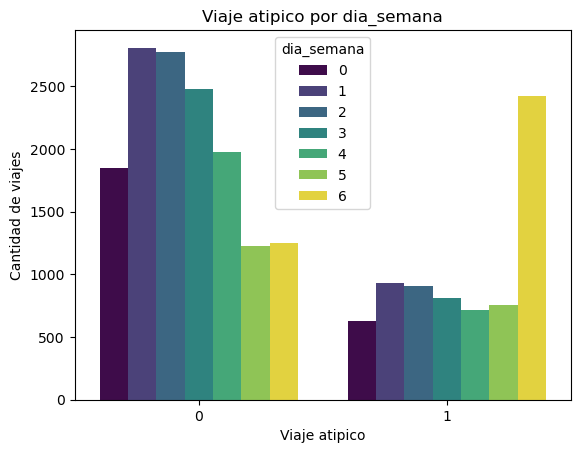

In [139]:
sns.countplot(data=df_balanced, x='Viaje_atipico', palette='viridis', hue='dia_semana')
plt.title('Viaje atipico por dia_semana')
plt.xlabel('Viaje atipico')
plt.ylabel('Cantidad de viajes')
plt.show()
#la mayoria de llos viajes atipicos caen en 6

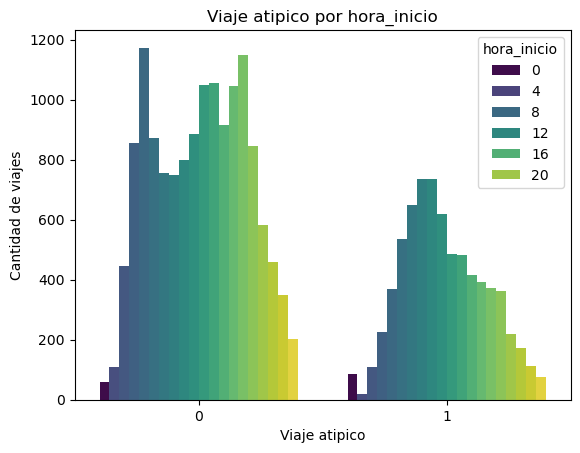

In [140]:
sns.countplot(data=df_balanced, x='Viaje_atipico', palette='viridis', hue='hora_inicio')
plt.title('Viaje atipico por hora_inicio')
plt.xlabel('Viaje atipico')
plt.ylabel('Cantidad de viajes')
plt.show()



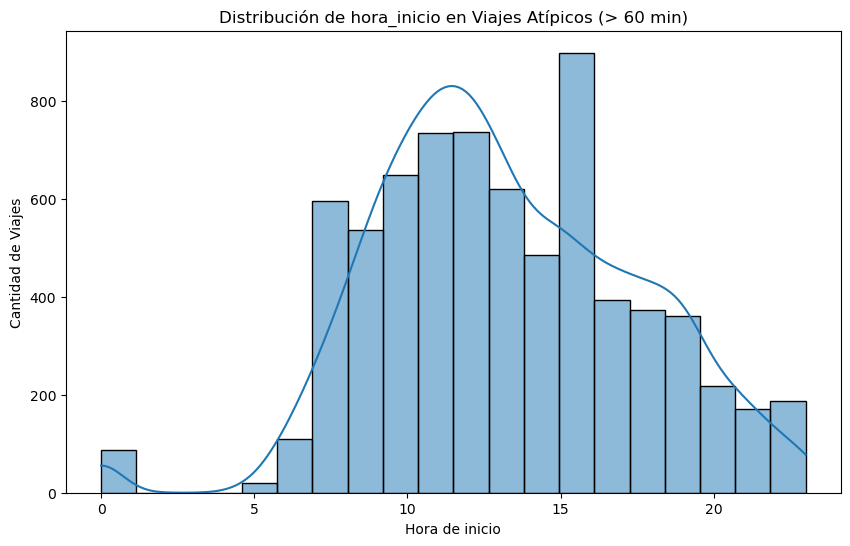

In [141]:
viajes_atipicos = df_balanced[df_balanced['Viaje_atipico'] == 1]

plt.figure(figsize=(10, 6))
sns.histplot(data=viajes_atipicos, x='hora_inicio', bins=20, kde=True)
plt.title('Distribución de hora_inicio en Viajes Atípicos (> 60 min)')
plt.xlabel('Hora de inicio')
plt.ylabel('Cantidad de Viajes')
plt.show()

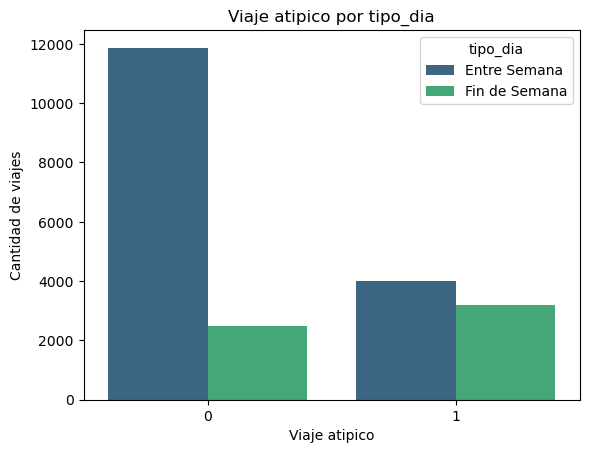

In [142]:
sns.countplot(data=df_balanced, x='Viaje_atipico', palette='viridis', hue='tipo_dia')
plt.title('Viaje atipico por tipo_dia')
plt.xlabel('Viaje atipico')
plt.ylabel('Cantidad de viajes')
plt.show()

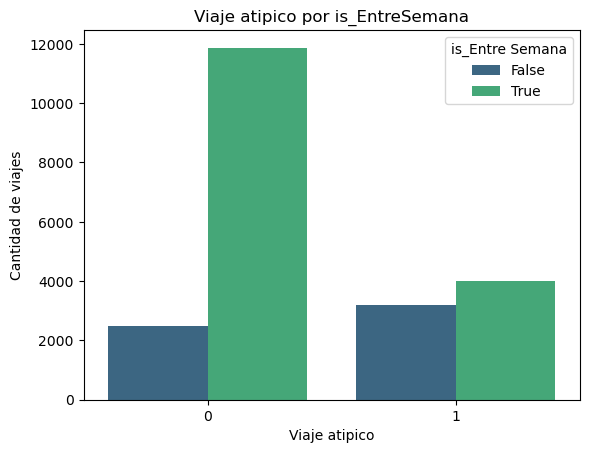

In [154]:
df_balanced_encoded = pd.get_dummies(df_balanced, columns=['tipo_dia'], prefix=['is'])

sns.countplot(data=df_balanced_encoded, x='Viaje_atipico', palette='viridis', hue='is_Entre Semana')
plt.title('Viaje atipico por is_EntreSemana')
plt.xlabel('Viaje atipico')
plt.ylabel('Cantidad de viajes')
plt.show()

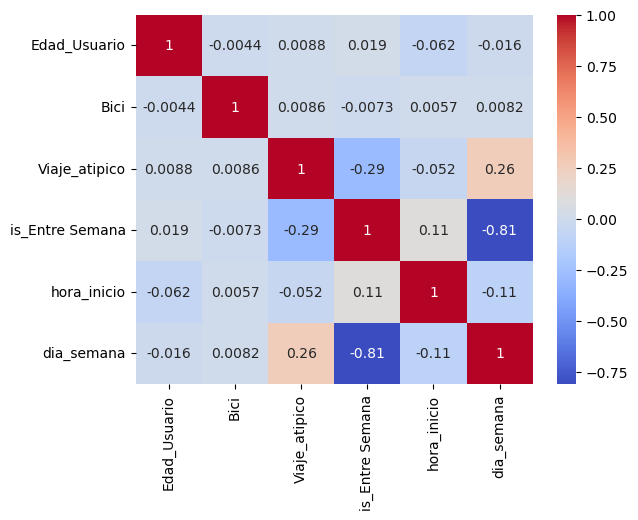

In [155]:
num_cols = ['Edad_Usuario', 'Bici', 'Viaje_atipico', 'is_Entre Semana', 'hora_inicio', 'dia_semana']
num_cols = [col for col in num_cols if col in df_balanced_encoded.columns]
corr = df_balanced_encoded[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [156]:
df_b_e_clean = df_balanced_encoded
df_b_e_clean['mes'] = df_b_e_clean['FechaHora_Retiro'].dt.month
df_b_e_clean['Ciclo_Estacion_Retiro'] = df_balanced_encoded['Ciclo_Estacion_Retiro'].str.replace('-', '', regex=False)
df_b_e_clean['Ciclo_EstacionArribo'] = df_balanced_encoded['Ciclo_EstacionArribo'].str.replace('-', '', regex=False)
df_b_e_clean['Ciclo_Estacion_Retiro'] = pd.to_numeric(df_balanced['Ciclo_Estacion_Retiro'], errors='coerce')
df_b_e_clean['Ciclo_EstacionArribo'] = pd.to_numeric(df_balanced['Ciclo_Estacion_Retiro'], errors='coerce')



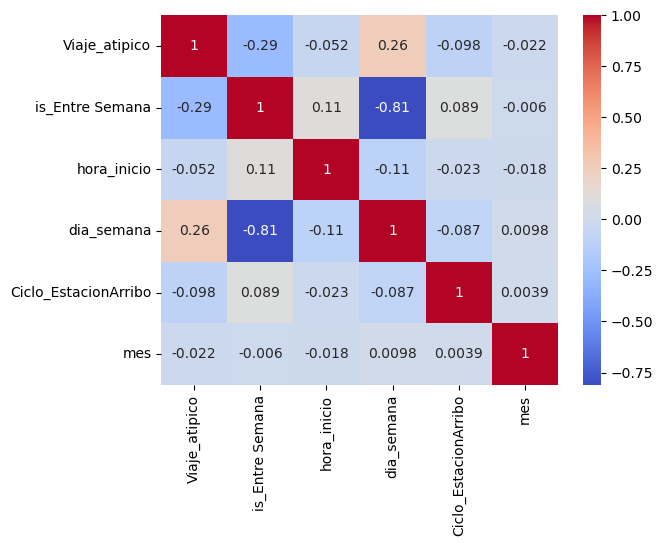

In [158]:
num_cols = ['Viaje_atipico', 'is_Entre Semana', 'hora_inicio', 'dia_semana', 'Ciclo_EstacionArribo', 'mes']
num_cols = [col for col in num_cols if col in df_b_e_clean.columns]
corr = df_b_e_clean[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [176]:
#guardamos solo los valores con relacion mayor a 0.05
df_final = df_b_e_clean
cols_delet = df_final.columns.drop(['hora_inicio', 'dia_semana', 'is_Entre Semana', 'Ciclo_EstacionArribo', 'Viaje_atipico'])
df_final = df_final.drop(columns=cols_delet)


In [178]:
print(df_final.isnull().sum())
#Ciclo_EstacionArribo tiene nulls pero son poco asi que eliminaremos las entradas
df_final.dropna(subset=['Ciclo_EstacionArribo'], inplace=True)
print(df_final.isnull().sum())

Ciclo_EstacionArribo    793
Viaje_atipico             0
dia_semana                0
hora_inicio               0
is_Entre Semana           0
dtype: int64
Ciclo_EstacionArribo    0
Viaje_atipico           0
dia_semana              0
hora_inicio             0
is_Entre Semana         0
dtype: int64


In [180]:
if not df_final.empty:
    # El paso final es cargar nuestros datos limpios y enriquecidos a un nuevo destino.
    # Opción 1: Guardar como un nuevo archivo CSV.
    try:
        df_final.to_csv("viajes_ecobici_limpios.csv", index=False)
        print("DataFrame transformado guardado exitosamente en 'viajes_ecobici_limpios.csv'")
    except Exception as e:
        print(f"Error al guardar el archivo CSV: {e}")

DataFrame transformado guardado exitosamente en 'viajes_ecobici_limpios.csv'


Modelo

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [182]:
# Function to visualize the confusion matrix.
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Matriz de Confusión para {model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Función para entrenar y evaluar un modelo
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = conf_matrix.ravel()

    return accuracy, precision, recall, f1, TN, FP, FN, TP

In [183]:
data = pd.read_csv('viajes_ecobici_limpios.csv')
X = data[data.columns.drop('Viaje_atipico')]
y = data['Viaje_atipico']

# Convert to pandas dataframe
df_model = pd.DataFrame(X)
df_model['target'] = y
df.head(10)


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,FechaHora_Retiro,FechaHora_Arribo
0,M,30.0,4998803,173,30/06/2025,23:33:59,348,01/07/2025,00:00:11,2025-06-30 23:33:59,2025-07-01 00:00:11
1,M,27.0,3976669,009,30/06/2025,23:41:24,086,01/07/2025,00:00:21,2025-06-30 23:41:24,2025-07-01 00:00:21
2,M,43.0,8223240,576,30/06/2025,23:48:16,296,01/07/2025,00:00:24,2025-06-30 23:48:16,2025-07-01 00:00:24
3,M,26.0,6050157,365,30/06/2025,23:52:12,329,01/07/2025,00:00:27,2025-06-30 23:52:12,2025-07-01 00:00:27
4,M,23.0,5124706,144,30/06/2025,23:54:55,575,01/07/2025,00:00:46,2025-06-30 23:54:55,2025-07-01 00:00:46
5,M,19.0,2053122,137,30/06/2025,23:33:00,343,01/07/2025,00:00:52,2025-06-30 23:33:00,2025-07-01 00:00:52
6,M,48.0,4574182,124,30/06/2025,23:46:14,576,01/07/2025,00:00:58,2025-06-30 23:46:14,2025-07-01 00:00:58
7,M,28.0,8244592,595,30/06/2025,23:47:40,618,01/07/2025,00:01:16,2025-06-30 23:47:40,2025-07-01 00:01:16
8,M,39.0,7042187,160,30/06/2025,23:17:37,255,01/07/2025,00:01:28,2025-06-30 23:17:37,2025-07-01 00:01:28
9,M,48.0,6648281,271-272,30/06/2025,23:49:30,545,01/07/2025,00:01:30,2025-06-30 23:49:30,2025-07-01 00:01:30


In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

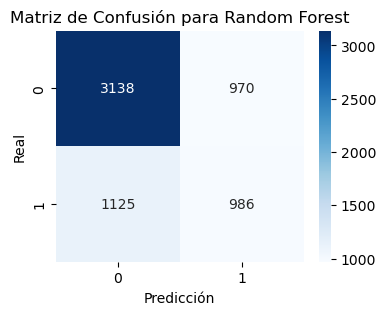

Model: Random Forest
Accuracy: 0.6631
Precision: 0.5041
Recall: 0.4671
F1-Score: 0.4849

Confusion Matrix:
TP: 986, FP: 970
FN: 1125, TN: 3138
---------------------------



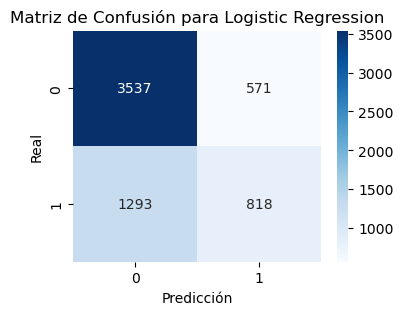

Model: Logistic Regression
Accuracy: 0.7003
Precision: 0.5889
Recall: 0.3875
F1-Score: 0.4674

Confusion Matrix:
TP: 818, FP: 571
FN: 1293, TN: 3537
---------------------------



c:\Users\arely\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


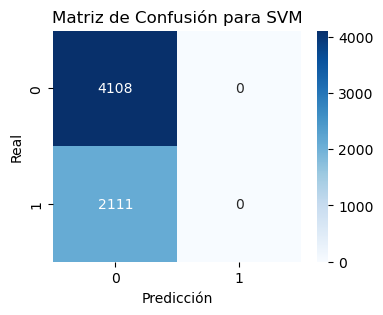

Model: SVM
Accuracy: 0.6606
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Confusion Matrix:
TP: 0, FP: 0
FN: 2111, TN: 4108
---------------------------



In [185]:
# Model List
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "SVM": SVC(random_state=42)
}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    accuracy, precision, recall, f1, TN, FP, FN, TP = evaluate_model(model, X_train, y_train, X_test, y_test)
    conf_matrix = np.array([[TN, FP], [FN, TP]])
    plot_confusion_matrix(conf_matrix, name)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(f"TP: {TP}, FP: {FP}")
    print(f"FN: {FN}, TN: {TN}")
    print("---------------------------\n")